Cross-Validation Scores: [0.89950235 0.90282002 0.90143766 0.9033596  0.90363611]
Mean CV Accuracy: 0.9021511472411967
Test Set Accuracy: 0.8973791883224593
Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



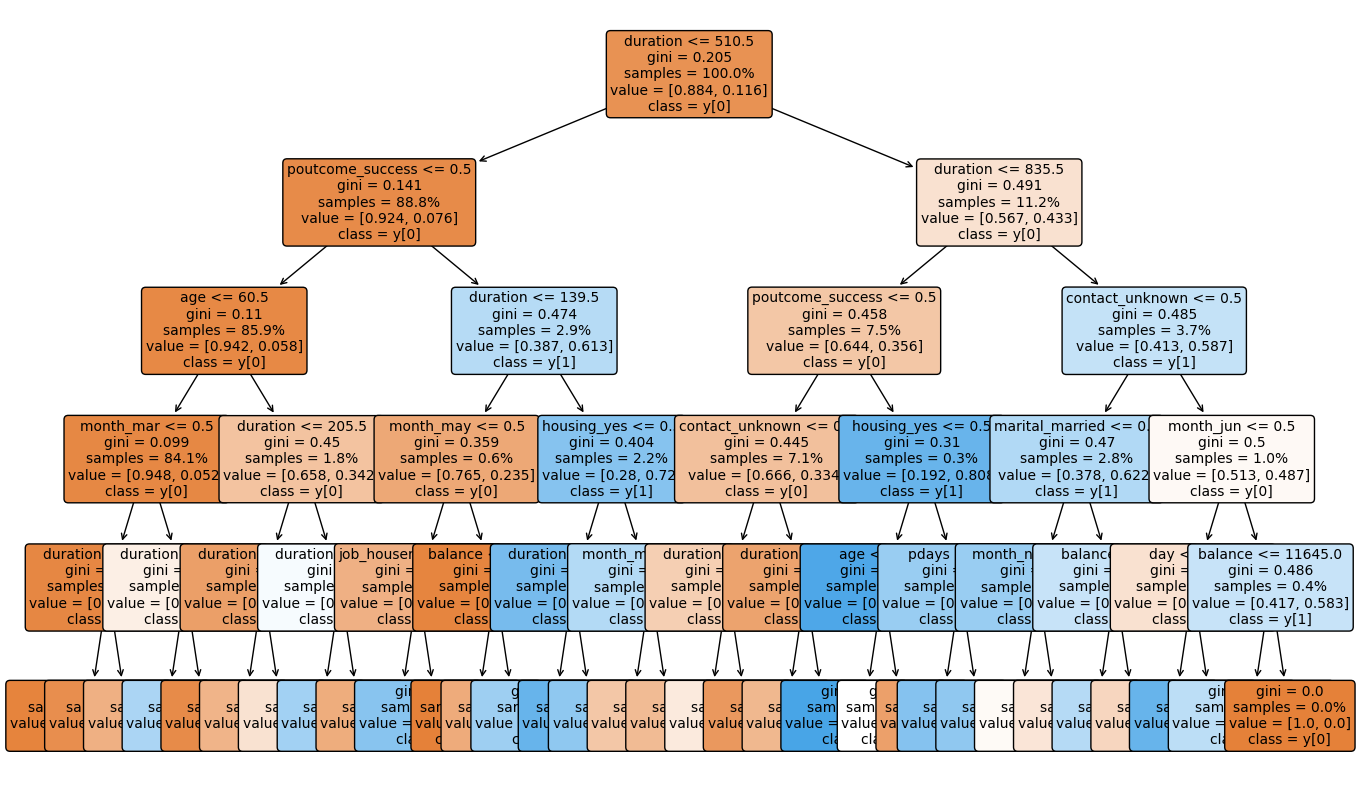

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset directly from the CSV file
data = pd.read_csv("bank-full.csv", sep=";")

# Check if the 'y' column exists
if 'y' in data.columns:
    # Split the data into features (X) and the target variable (y)
    X = data.drop('y', axis=1)
    y = data['y']

    # One-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    
    # Cross-validation
    cross_val_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", cross_val_scores)
    print("Mean CV Accuracy:", np.mean(cross_val_scores))

    # Train the best model
    best_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = best_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Test Set Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Visualize the decision tree with improved settings
    plt.figure(figsize=(16, 10))
    plot_tree(
        best_clf,
        filled=True,
        feature_names=X.columns,
        class_names=True,
        proportion=True,
        rounded=True,
        fontsize=10
    )
    plt.show()
else:
    print("The 'y' column does not exist in the dataset.")
